In [1]:
%load_ext autoreload
%autoreload 2
#existing packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q
from core import prices as pr

## Double Q-learning

In [2]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_dQ.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.25037938, 0.30700889],
       [0.26395463, 0.28636831],
       [0.27200292, 0.30160775],
       ...,
       [0.23849556, 0.31347582],
       [0.28421725, 0.28881984],
       [0.27611147, 0.27937068]]), array([[0.26489831, 0.30435265],
       [0.31259955, 0.27224633],
       [0.27462186, 0.29515579],
       ...,
       [0.26693475, 0.29674048],
       [0.28696351, 0.2778394 ],
       [0.26535303, 0.2841098 ]]), array([[0.26366089, 0.29440254],
       [0.27784439, 0.30794099],
       [0.28553535, 0.29539588],
       ...,
       [0.26626225, 0.27605368],
       [0.25685148, 0.27251361],
       [0.29592522, 0.24899316]]), array([[0.26907791, 0.28801594],
       [0.27516809, 0.28547312],
       [0.25027861, 0.305412  ],
       ...,
       [0.26439575, 0.28054763],
       [0.28193848, 0.3119837 ],
       [0.28318025, 0.28442837]]), array([[0.29121381, 0.22847261],
       [0.29327718, 0.26452044],
       [0.27184643, 0.30149844],
       ...,
       [0.27510459, 0.26207876],
       

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_1050/1975195102.py:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Volumes/OS-Data/Suzie_data/RLandPricing/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


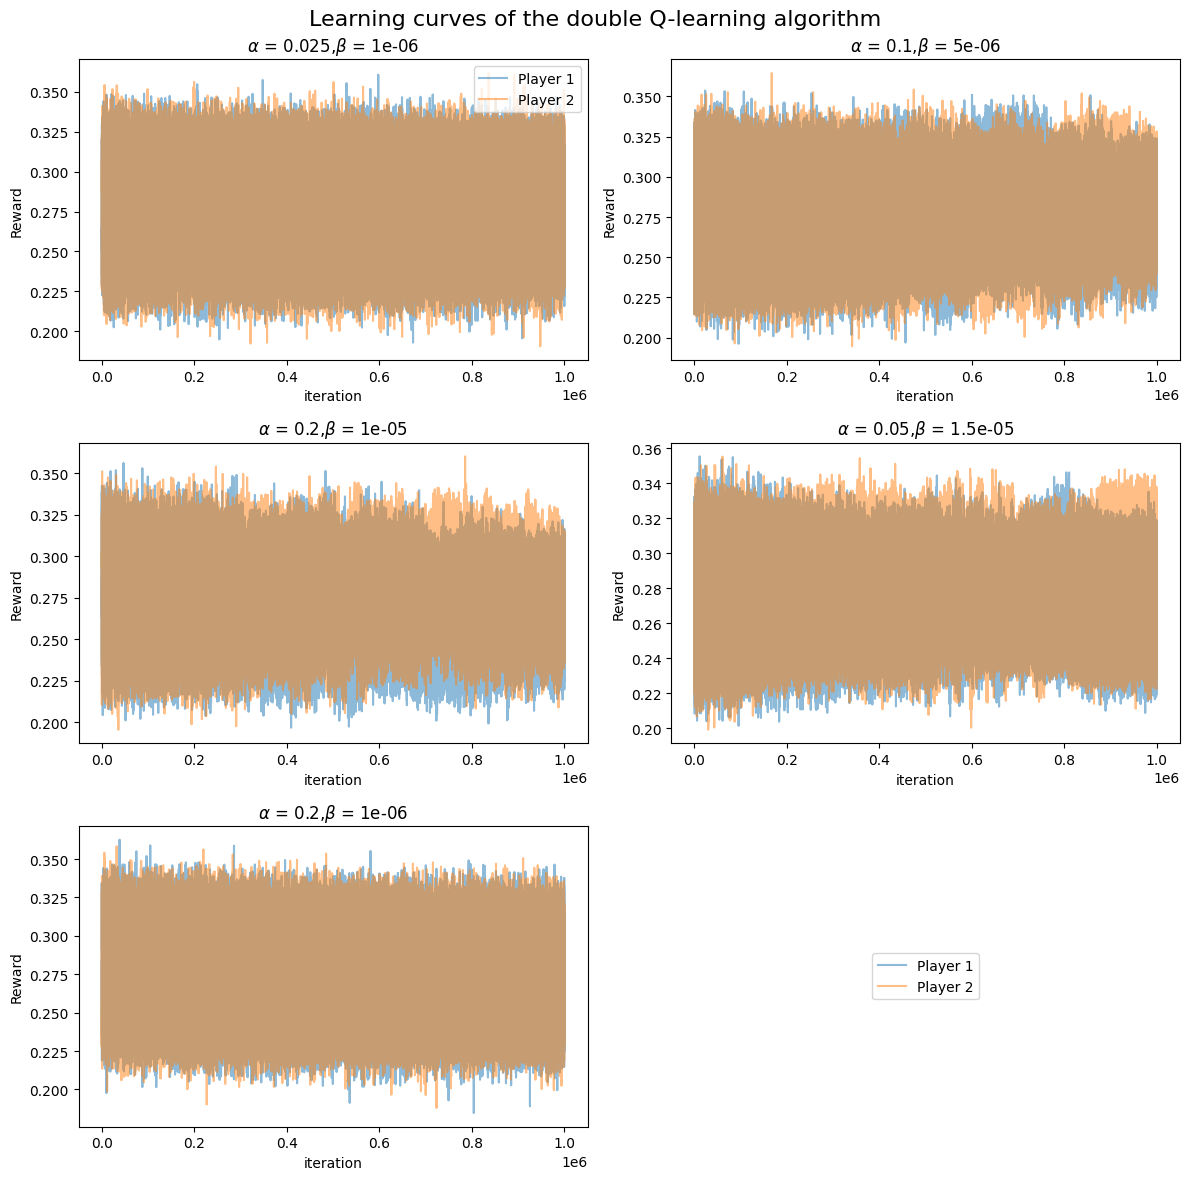

In [3]:
num_players = 2
num_graphs = len(aggregated_agents)
rep = [[0.025,10**(-6)],[0.1,0.5*10**(-5)],[0.2,10**(-5)],[0.05,1.5*10**(-5)],[0.2,10**(-6)]]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\alpha$ = {rep[graph_num][0]},$\\beta$ = {round(rep[graph_num][1],8)}')
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 5:
    for i in range(num_graphs, 5):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')


fig.suptitle('Learning curves of the double Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [4]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.47270121 0.47335615]
 [0.44172241 0.53747051]
 [0.38797883 0.45755522]
 [0.46553879 0.48982683]
 [0.46844616 0.44457168]]


[0.47302868 0.48959646 0.42276703 0.47768281 0.45650892]


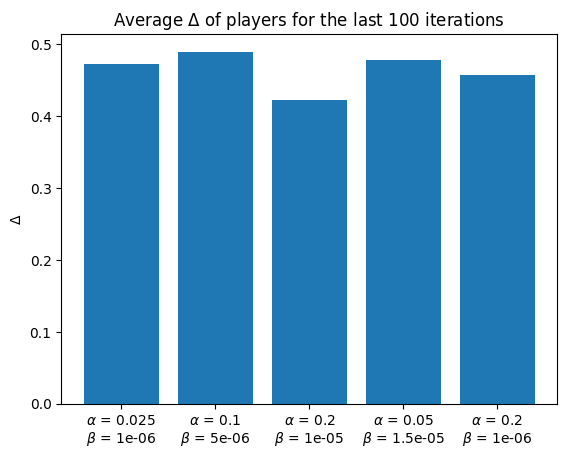

In [5]:
av = np.mean(DRmean, axis=1)
print(av)
fig.set_size_inches(8, 16)
plt.bar([f'$\\alpha$ = {rep[graph_num][0]}\n$\\beta$ = {round(rep[graph_num][1],8)}' for graph_num 
         in range(len(rep))],av)
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations')
plt.show()